# Demo of From-scratch Logistic Regression Model
This notebook serves as a demo of the logistic regression class in `logreg.py`. The data is derived from a Portugese bank's telemarketing campaign aimed at getting more term deposit subscriptions. They dependent variable we are trying to predict is a binary 'yes' or 'no' to whether or not a callee will subscribe to a term deposit.

Since the main purpose is to show that the from-scratch logreg class trains well and functions to make predictions, many of the niceties of data processing are skipped here (for example, data is un-normalized). 

In [1]:
import logreg
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

import time

np.random.seed(123)

In [2]:
data = pd.read_csv('../data/bank.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# get targets
y = data.y.apply(lambda x: 0 if x == 'no' else 1)
data = data.drop('y', axis=1)

### Transform categorical data

In [4]:
# candidates for integer encoding (ordinal variables):
to_label = ['education', 'month', 'housing']

# candidates for one-hot encoding (nominal variables):
to_onehot = ['job', 'loan', 'marital', 'contact', 'poutcome', 'default']

# scikit-learn label encoder
le = LabelEncoder()

# get dummy and label encodings
dummies = pd.get_dummies(data[to_onehot])
labels = data[to_label].apply(le.fit_transform)

# Convert dataframe to dummy and label encodings
data[to_label] = labels
data = pd.concat([data, dummies], axis=1)
data = data.drop(to_onehot, axis=1)

### Get target and predictor variables

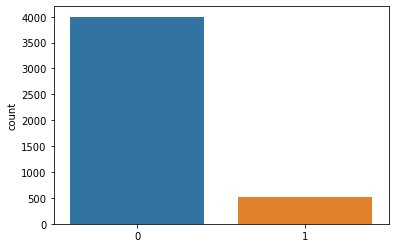

Positive class representation: 11.52 %


In [5]:
# Get predictors and targets
X = data.to_numpy()
y = y.to_numpy()

sns.countplot(x=y)
plt.show()
print(f'Positive class representation: {y.mean() * 100:.2f} %')

In [6]:
# positive class is under represented, but oversampling decreases performance. Uncomment to see.
# oversampler = SMOTE()
# X, y = oversampler.fit_resample(X, y)

In [7]:
# split into test/training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Loss after 1000 epochs: 12.927017746334364
Loss after 2000 epochs: 9.798793978733542
Loss after 3000 epochs: 7.8971317717669365
Loss after 4000 epochs: 6.06793655292958
Loss after 5000 epochs: 4.107289552248196
Loss after 6000 epochs: 2.456369591183136
Loss after 7000 epochs: 1.5753031953946204
Loss after 8000 epochs: 1.2096348132120067
Loss after 9000 epochs: 1.0672940395379216
Loss after 10000 epochs: 0.9975542992491369
Loss after 11000 epochs: 0.9446995634642684
Loss after 12000 epochs: 0.92183746702779
Loss after 13000 epochs: 0.9033104256766613
Loss after 14000 epochs: 1.011236563702337
Loss after 15000 epochs: 0.8679377743007934
Loss after 16000 epochs: 0.8890901271862601
total training time: 7.399847030639648 sec


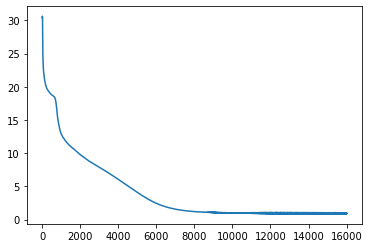

In [8]:
# create logistic regression model using all variables
regressor = logreg.BinaryLogisticRegression(X.shape[-1])

# train logistic regression model
epochs = 16000
start = time.time()
loss = regressor.train(X_train, y_train, epochs=epochs, lr=1e-5, print_every=1000)
end = time.time()
print(f'total training time: {end - start} sec')

# plot average loss per epoch
sns.lineplot(x=range(epochs), y=loss)
plt.show()

In [9]:
y_hat = regressor.infer(X_test)
prediction = [1 if y > 0.5 else 0 for y in y_hat]

In [10]:
# accuracy: 
(y_test == prediction).mean()

0.8486187845303867